选股策略：https://mp.weixin.qq.com/s/2D7PGtiTKnfdPuNnMyptew  
数据接口：https://tushare.pro/document/2?doc_id=112  
K线图API: https://matplotlib.org/api/finance_api.html

底部建仓策略  
- 底部：当前价格在近一年的最低价上浮一个百分比内，比如10%-20%以内。

- 周线圆弧底：周线近3个月都是横盘整理：5周均线平滑 —— (均线最高 - 均线最低)/均线最低 < 0.7(一个比例)  

- 成交量/换手率放大：过去两周成交量有两天显著高于过去两周平均成交量。
1. 提供函数显示过去一个月平均成交量  
2. 提供函数显示过去一个月和两周的平均换手率  

- 月线反转信号：近半年的月线出现长上影线（上引线是实体的1.2倍）  

- pe 所在历史百分位: https://androidinvest.com/Stock/History/SH600000/

In [1]:
import pandas as pd
import datetime

In [2]:
import tushare as ts
ts.set_token('047e2bcae2ea6c2f6f225eeb62087d27e1981988e758c82ba1997971')
pro = ts.pro_api()
pd.set_option('display.max_rows', 1000)

In [3]:
# 获取可转债数据
df = ts.new_cbonds()
df.head()

ElementTree not initialized, missing root
ElementTree not initialized, missing root
ElementTree not initialized, missing root


AttributeError: 'NoneType' object has no attribute 'head'

In [196]:
#获取全部股票代码
stocklist = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
stocklist.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


In [23]:
#某只股票当天的数据
pro = ts.pro_api()
df = pro.daily(ts_code='603912.SH', start_date='201807', end_date='201901')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,603912.SH,20181228,13.46,13.87,13.21,13.36,13.68,-0.32,-2.3392,42530.20,57181.888
1,603912.SH,20181227,13.96,14.16,13.63,13.68,13.83,-0.15,-1.0846,49122.84,68266.540
2,603912.SH,20181226,14.56,14.56,13.80,13.83,14.64,-0.81,-5.5328,63913.80,90465.923
3,603912.SH,20181225,14.07,14.66,13.62,14.64,14.30,0.34,2.3776,76565.26,108960.871
4,603912.SH,20181224,13.65,14.35,13.57,14.30,13.76,0.54,3.9244,74497.67,105019.188


K线图

In [21]:
import matplotlib as mpl
import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
from matplotlib.pylab import date2num ## 导入日期到数值一一对应的转换工具
from dateutil.parser import parse ## 导入转换到指定格式日期的工具

In [24]:
cols = list(df)
cols.insert(len(cols)-1,cols.pop(cols.index('ts_code')))
df = df.loc[:,cols]
df['trade_date']=df['trade_date'].map(lambda x:date2num(parse(x)))
df.head()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ts_code
0,737056.0,13.46,13.87,13.21,13.36,13.68,-0.32,-2.3392,42530.20,57181.888,603912.SH
1,737055.0,13.96,14.16,13.63,13.68,13.83,-0.15,-1.0846,49122.84,68266.540,603912.SH
2,737054.0,14.56,14.56,13.80,13.83,14.64,-0.81,-5.5328,63913.80,90465.923,603912.SH
3,737053.0,14.07,14.66,13.62,14.64,14.30,0.34,2.3776,76565.26,108960.871,603912.SH
4,737052.0,13.65,14.35,13.57,14.30,13.76,0.54,3.9244,74497.67,105019.188,603912.SH


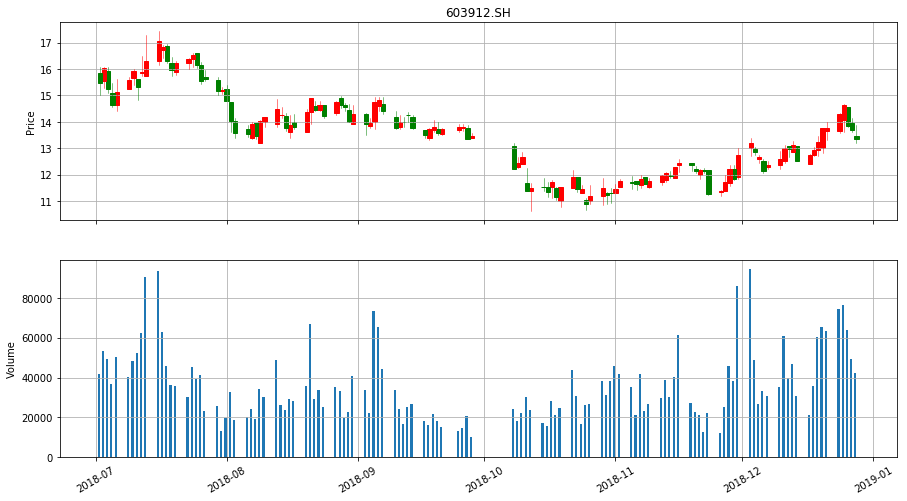

In [35]:
#time, open, high, low, close
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,8))
plt.xticks(rotation=30)
mpf.candlestick_ohlc(ax1, df.values, width=1.0, colorup = 'r', colordown = 'g')
ax1.set_title(df.loc[0,'ts_code'])
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.xaxis_date()
plt.bar(df['trade_date']-0.25, df['vol'], width= 0.5)
ax2.set_ylabel('Volume')
ax2.grid(True)

In [53]:
def k_pic(ts_code, start_date, end_date):
    df_all = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    k_pic_single(df_all, ts_code, start_date, end_date)
    df_all = pro.monthly(ts_code=ts_code, start_date=start_date, end_date=end_date)
    k_pic_single(df_all, ts_code, start_date, end_date)
    df_all = pro.weekly(ts_code=ts_code, start_date=start_date, end_date=end_date)
    k_pic_single(df_all, ts_code, start_date, end_date)
    
def k_pic_single(df_all, ts_code, start_date, end_date):
    df= df_all.loc[:, ['trade_date','open','high','low','close','pre_close','vol','ts_code']]
    df['trade_date']=df['trade_date'].map(lambda x:date2num(parse(x)))
    #time, open, high, low, close
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,8))
    plt.xticks(rotation=30)
    mpf.candlestick_ohlc(ax1, df.values, width=1.0, colorup = 'r', colordown = 'g')
    ax1.set_title(df.loc[0,'ts_code'])
    ax1.set_ylabel('Price')
    ax1.grid(True)
    ax1.xaxis_date()
    plt.bar(df['trade_date']-0.25, df['vol'], width= 0.5)
    plt.xticks(rotation=30)
    ax2.set_ylabel('Volume')
    ax2.grid(True)

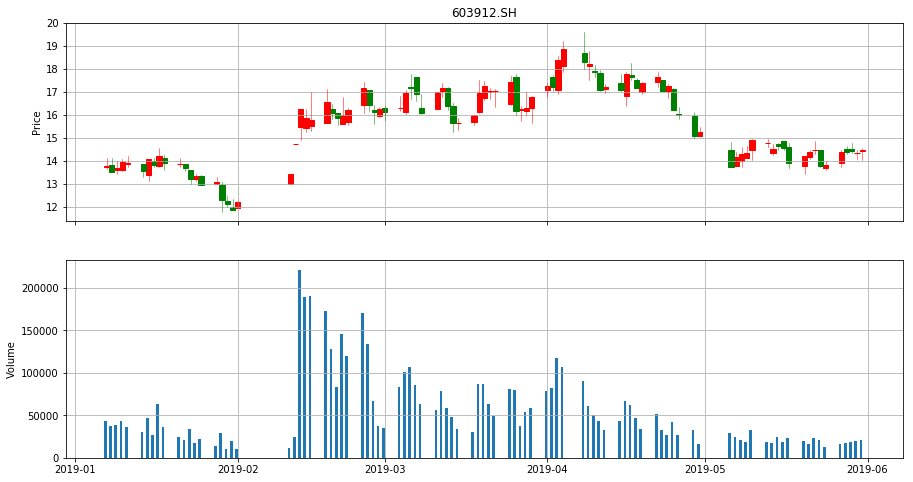

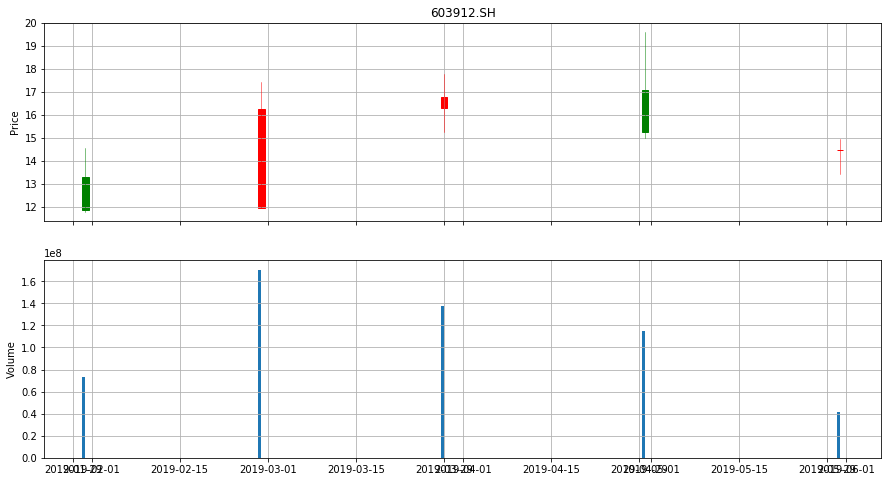

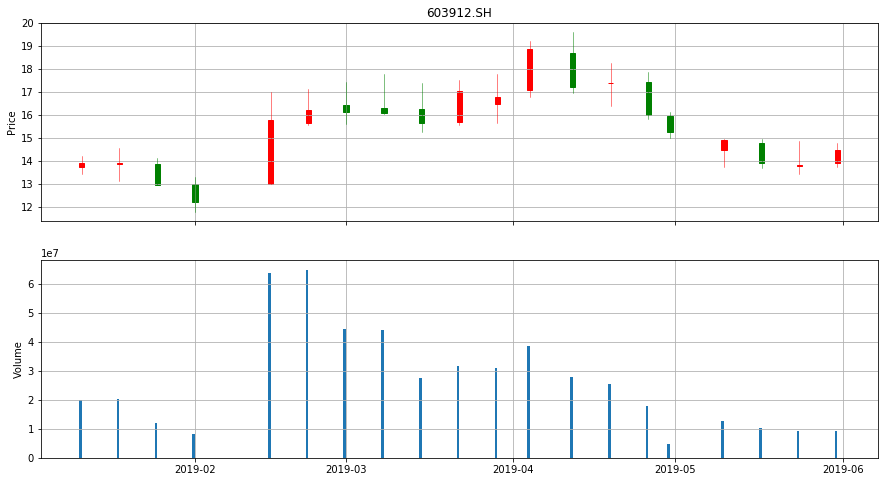

In [179]:
k_pic('603912.SH', start_date, end_date)

### 选股开始

In [29]:
pro = ts.pro_api()

#daily
def getHistoryTrade(code):
    start_date = (datetime.datetime.now() - datetime.timedelta(days=DailyHistoryLowDateAgo)).strftime('%Y%m%d')
    end_date = datetime.datetime.now().strftime('%Y%m%d')
    dfs = pro.daily(ts_code=code, start_date=start_date, end_date=end_date)
    history_low = dfs.loc[:, 'low'].min()
    current = dfs.sort_values('trade_date',ascending=False).loc[0, 'low']    
    return [history_low, current]

#week
def getWeekTrade(code):
    start_date = (datetime.datetime.now() - datetime.timedelta(days=WeekParentDateAgo)).strftime('%Y%m%d')
    end_date = datetime.datetime.now().strftime('%Y%m%d')
    dfs = pro.weekly(ts_code=code, start_date=start_date, end_date=end_date)
    isParentBottom = parentBottom(dfs)
    return isParentBottom

#month 
def getMonthTradeShadow(code):
    start_date = (datetime.datetime.now() - datetime.timedelta(days=MonthShadowDateAgo)).strftime('%Y%m%d')
    end_date = datetime.datetime.now().strftime('%Y%m%d')
    dfs = pro.monthly(ts_code=code, start_date=start_date, end_date=end_date)
    flag = False
    for index, row in dfs.iterrows():
        isupShadow = upShadow(row)
        flag = flag | isupShadow
    return flag

#month 
def getMonthTrade(df):
    start_date = (datetime.datetime.now() - datetime.timedelta(days=MonthShadowDateAgo)).strftime('%Y%m%d')
    end_date = datetime.datetime.now().strftime('%Y%m%d')
    for index, row in df.iterrows():
            dfs = pro.monthly(ts_code=row['ts_code'], start_date=start_date, end_date=end_date)
            for indexs, rows in dfs.iterrows():
                df.loc[index, rows['trade_date']] = upShadowRatio(rows)


#计算月上影线率
def upShadowRatio(rows):
    obj = max(abs(rows['open'] - rows['close']), 0.0001)
    if rows['open'] > rows['close']:
        gap=(rows['high'] - rows['open'])/obj
    else:
        gap=(rows['high'] - rows['close'])/obj
    return gap
    
#计算月上影线
def upShadow(df):
    obj = max(abs(df['open'] - df['close']), 0.0001)
    if df['open'] > df['close']:
        gap=(df['high'] - df['open'])/obj
    else:
        gap=(df['high'] - df['close'])/obj
    if gap > ShadowThreshold:
        return True
    else:
        return False
    
#计算周圆括弧
def parentBottom(df):
    return True

In [56]:
DailyHistoryLowDateAgo = 365*3
MonthShadowDateAgo = 4*30
WeekParentDateAgo = 8 * 7
ShadowThreshold = 1.2
start_date='20190105' #k线图起始日期
end_date='20190602'   #k线图结束日期
ShowStocks=2000

In [ ]:
#获取全部股票代码
stocklist = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
stocklist.head()
#某只股票三年最低 #获取当前股价
# stocklist = stocklist[:ShowStocks]
hisLow_current = stocklist['ts_code'].map(lambda x:getHistoryTrade(x))
hisLow=hisLow_current.map(lambda x : x[0])
current=hisLow_current.map(lambda x : x[1])
stocklist['low']=hisLow
stocklist['current'] = current

getMonthTrade(stocklist)
# upshadowRatio=stocklist['ts_code'].map(lambda x:getMonthTrade(x))
# stocklist['upshadowRatio']=upshadowRatio

In [44]:
stocklist.head(ShowStocks)

,ts_code,symbol,name,area,industry,list_date,low,current,20190531,20190430,20190329,20190228
0,000001.SZ,000001,平安银行,深圳,银行,19910403,8.45,13.58,0.271739,0.970588,1.647059,0.258621
1,000002.SZ,000002,万科A,深圳,全国地产,19910129,16.74,28.12,0.238462,1.205607,0.011450,4.375000
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114,14.05,21.80,0.373626,0.652778,0.000000,0.274554
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210,2.42,2.94,0.304348,0.700000,1.653846,0.338983
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427,4.51,5.55,0.000000,0.560000,0.546875,0.152174
5,000007.SZ,000007,全新好,深圳,酒店餐饮,19920413,4.61,7.07,0.265957,0.780220,4.285714,0.228723
6,000008.SZ,000008,神州高铁,北京,运输设备,19920507,3.40,3.84,0.027027,1.023810,3.125000,0.310000
7,000009.SZ,000009,中国宝安,深圳,综合类,19910625,3.51,5.81,1.238095,1.000000,0.631579,0.224299
8,000010.SZ,000010,*ST美丽,深圳,建筑施工,19951027,2.81,3.40,0.333333,2.769231,12.166667,0.468750
9,000011.SZ,000011,深物业A,深圳,区域地产,19920330,8.05,9.57,0.500000,0.690000,1.065934,0.182390


In [45]:
stocklist.sort_values('20190531', ascending=False)

,ts_code,symbol,name,area,industry,list_date,low,current,20190531,20190430,20190329,20190228
143,000553.SZ,000553,安道麦A,湖北,农药化肥,19931203,8.95,11.16,15500.000000,4.155172,7.111111,0.174825
125,000532.SZ,000532,华金资本,广东,多元金融,19940103,7.02,10.57,4800.000000,1.070707,2.413793,0.505455
62,000151.SZ,000151,中成股份,北京,商贸代理,20000906,8.97,11.99,24.000000,8.871795,1.756410,0.266917
151,000563.SZ,000563,陕国投A,陕西,多元金融,19940110,2.29,4.46,17.000000,0.985915,1.739130,0.259615
15,000019.SZ,000019,深粮控股,深圳,其他商业,19921012,6.70,7.23,15.000000,0.489583,3.000000,0.350877
157,000570.SZ,000570,苏常柴A,江苏,机械基件,19940701,3.40,5.03,13.166667,0.671642,1.268519,0.265625
118,000524.SZ,000524,岭南控股,广东,酒店餐饮,19931118,6.06,8.47,12.333333,1.795455,1.333333,0.336735
71,000333.SZ,000333,美的集团,广东,家用电器,20130918,22.50,51.83,11.066667,1.274194,2.333333,0.469388
46,000061.SZ,000061,农产品,深圳,农业综合,19970110,3.89,5.55,9.428571,1.285714,2.642857,0.171171
30,000037.SZ,000037,深南电A,深圳,火力发电,19940701,4.23,13.22,9.285714,0.523121,0.319106,0.000000


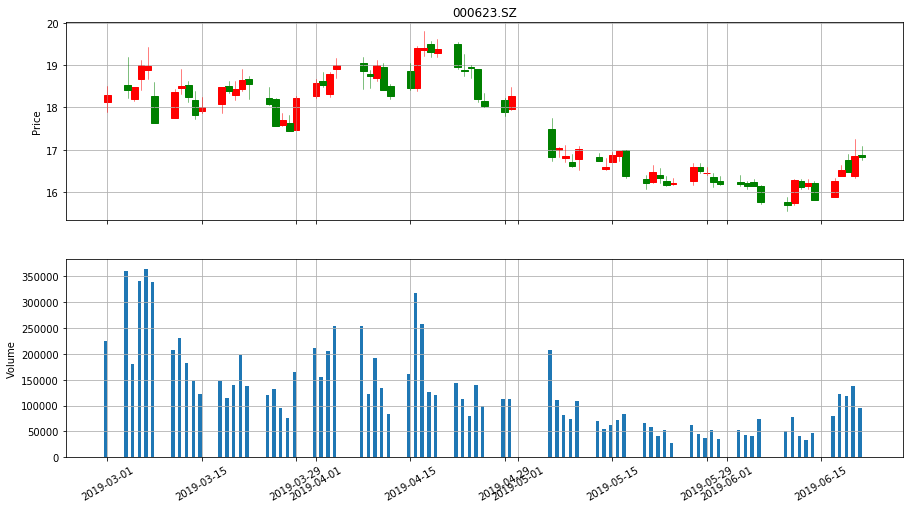

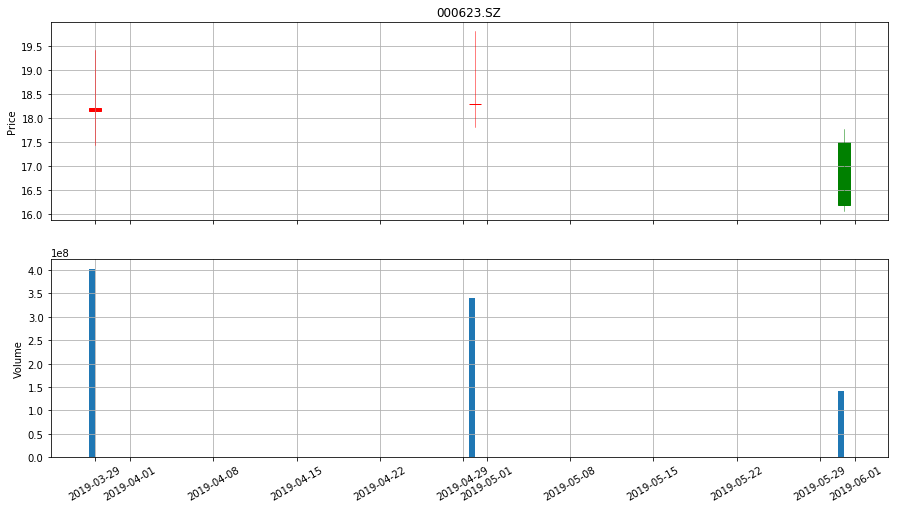

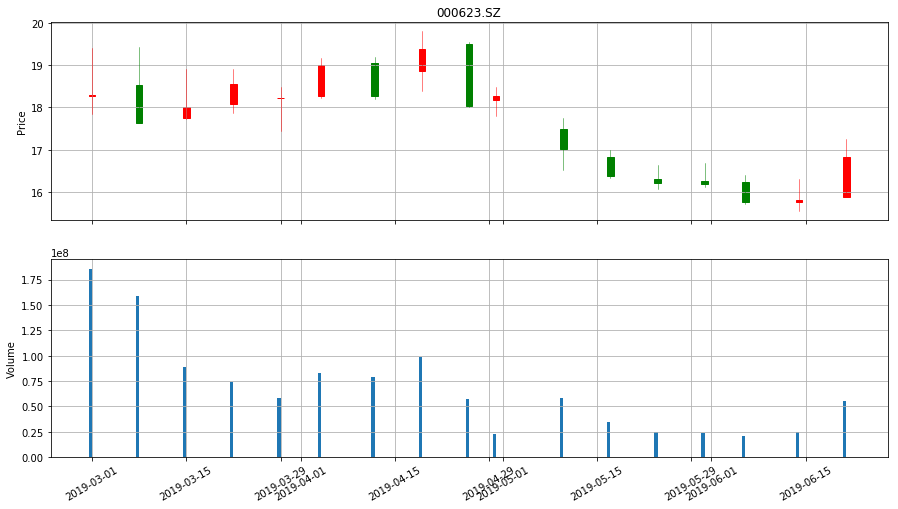

In [54]:
k_pic('000623.SZ', '20190300', '20190629')